In [362]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pylab as pl

import colombia_weather
import prepare

In [2]:
df = prepare.get_prepped()

### Data Dictionary
1. region: Coffee producing region in Colombia (top 13 regions)
2. mean_precip: mean precipitation in Colombia (cm)
3. mean_temp: average temperature in Colombia region (degrees F)
4. min_temp: minimum temperature (degrees F)
5. max_temp: maximum temperature (degrees F)
6. price: export price of excelso coffee USD per lb
7. quanity: thousands of 60kg bags of coffee exported 
8. inflated: export price adjusted for inflation in 2018 dollars  

In [83]:
df.head()

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.68,387.519181,0.040000,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.95,389.809684,0.040000,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367
1960-03-01,266.0,45.10,382.598841,0.143158,71.875000,54.741925,0.124545,58.347826,34.199076,0.012903,...,66.368796,0.061226,83.154188,73.557848,-0.178350,87.567455,76.982745,0.154044,69.713106,61.178475
1960-04-01,264.0,45.20,383.447176,0.525000,72.687500,55.906027,0.113750,59.687500,38.081443,0.008000,...,67.912503,0.204186,82.330770,71.204803,-0.095321,87.131671,78.062566,0.203308,69.024617,61.300378
1960-05-01,602.0,44.73,379.460004,0.191000,72.181818,55.326548,0.276555,59.458333,38.367067,0.016774,...,67.875379,0.195359,81.782540,70.861052,0.042621,85.752403,78.742579,0.150532,69.160477,60.614402


In [4]:
df.shape

(708, 42)

In [5]:
df.describe()

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,888.759887,117.042459,287.522823,0.205316,73.056972,59.601523,0.111022,55.799535,36.948408,0.168615,...,68.711412,0.303984,82.500963,70.799932,0.161536,85.741351,72.637999,0.143983,71.144774,62.385355
std,381.462823,60.337486,161.812973,0.194527,1.878465,3.126061,0.130392,1.238506,4.892166,0.208815,...,3.293696,0.226430,1.544705,3.481000,0.233844,1.780971,2.427677,0.198461,1.348889,2.002072
min,127.000000,37.270000,79.446600,0.000000,67.633333,41.000000,0.000000,52.096774,20.000000,0.000000,...,50.000000,-0.054432,76.500000,52.000000,-0.178350,80.000000,63.000000,0.000000,66.000000,50.000000
25%,620.750000,62.390000,165.116364,0.117473,71.734127,58.477283,0.052315,54.967742,34.000000,0.057231,...,67.010908,0.144649,81.571429,70.000000,0.018400,84.596552,71.400667,0.074420,70.168146,61.260518
50%,830.500000,122.592833,287.605531,0.189282,73.000000,60.171341,0.091488,55.741935,37.000000,0.136231,...,69.168936,0.276590,82.468180,71.550107,0.123731,85.835993,72.843232,0.126492,71.100750,63.000000
75%,1096.500000,150.430000,356.107896,0.248600,74.130108,61.733187,0.142182,56.612903,40.000000,0.216435,...,71.000000,0.413215,83.355415,72.000000,0.242173,86.963174,74.000000,0.167565,71.965150,63.813985
max,2755.000000,319.670000,1324.610143,2.550000,81.000000,69.000000,1.996667,59.935484,50.000000,2.775000,...,75.000000,1.711429,87.714286,77.000000,3.160000,91.000000,79.000000,4.620000,76.000000,68.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 708 entries, 1960-01-01 to 2018-12-01
Data columns (total 42 columns):
quantity                    708 non-null float64
price                       708 non-null float64
inflated                    708 non-null float64
Caldas_mean_precip          708 non-null float64
Caldas_mean_temp            708 non-null float64
Caldas_min_temp             708 non-null float64
Cundinamarca_mean_precip    708 non-null float64
Cundinamarca_mean_temp      708 non-null float64
Cundinamarca_min_temp       708 non-null float64
Narino_mean_precip          708 non-null float64
Narino_mean_temp            708 non-null float64
Narino_min_temp             708 non-null float64
Cauca_mean_precip           708 non-null float64
Cauca_mean_temp             708 non-null float64
Cauca_min_temp              708 non-null float64
Risaralda_mean_precip       708 non-null float64
Risaralda_mean_temp         708 non-null float64
Risaralda_min_temp          708 non-null fl

### *Hypothesis: Day-to-day weather does not influence coffee prices, but unusual weather events have a great impact on prices.*

To Do:
- Look at each region independently vs price
- Look at each weather feature vs price 
- Look at the delta in temp compared to price (max vs min)
- Look at quantity vs price 
- Look at extreme events to label
- Possible statistical tests

#### Understand Price - Target 

In [93]:
# Price
pmax = df.price.max()
pmin = df.price.min()
pmean = round(df.price.mean(), 2)

print(f'The max price we have is: ${pmax}')
print(f'The min price we have for coffee is: ${pmin}')
print(f'The overall average price for coffee is: ${pmean}')

The max price we have is: $319.67
The min price we have for coffee is: $37.27
The overall average price for coffee is: $117.04


In [96]:
# Inflated price
pmax = round(df.inflated.max(), 2)
pmin = round(df.inflated.min(), 2)
pmean = round(df.inflated.mean(), 2)

print(f'The max inflated price we have is: ${pmax}')
print(f'The min inflated price we have for coffee is: ${pmin}')
print(f'The overall average inflated price for coffee is: ${pmean}')

The max inflated price we have is: $1324.61
The min inflated price we have for coffee is: $79.45
The overall average inflated price for coffee is: $287.52


In [100]:
quantity = round(df.quantity.mean(), 2)

print(f'The average quantity of coffee exported is: {quantity}')

The average quantity of coffee exported is: 888.76


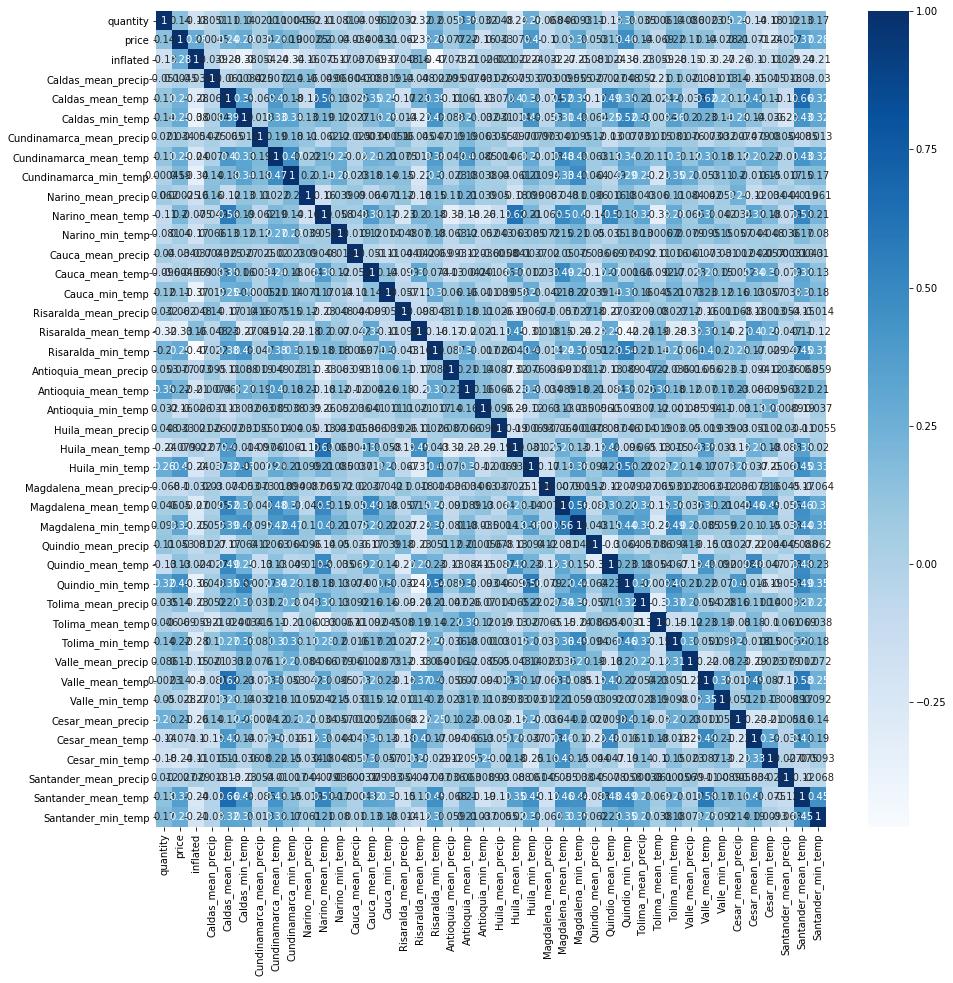

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()
# insane

What does the price distribution look like throughout the years of data obtained?

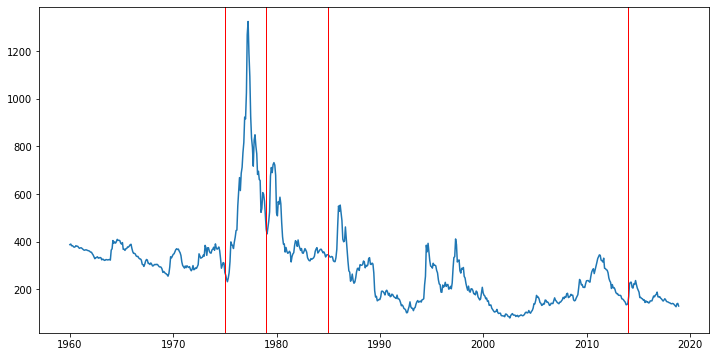

In [361]:
plt.figure(figsize=(12,6))
plt.plot(df.inflated)
date_ = '1975'
plt.axvline(pd.to_datetime(date_), linewidth=1, color='red')
datetime = '1979'
plt.axvline(pd.to_datetime(datetime), linewidth=1, color='red')
date = '1985'
plt.axvline(pd.to_datetime(date), linewidth=1, color='red')
datet = '2014'
plt.axvline(pd.to_datetime(datet), linewidth=1, color='red')
plt.show()
# add in vlines to show extreme weather events and annotate them

In [ ]:
# There are some major spikes in the data around 1976, 1986, 1995, 1998, and 2010
# Potential causes of price spikes: look at Colombian history doc to potentially find influences of spikes/dips

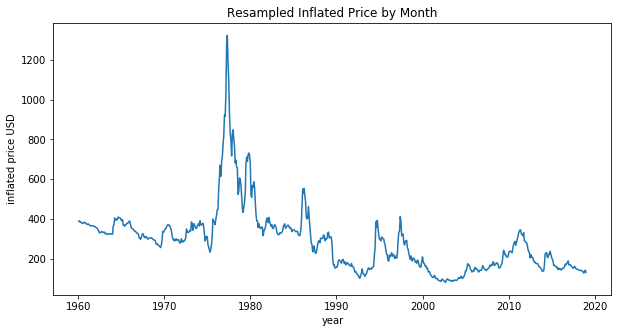

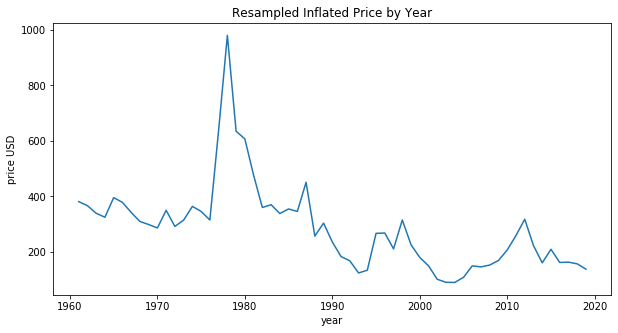

In [327]:
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('M').mean())
plt.title('Resampled Inflated Price by Month')
plt.xlabel('year')
plt.ylabel('inflated price USD')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(df.inflated.resample('Y').mean())
plt.title('Resampled Inflated Price by Year')
plt.xlabel('year')
plt.ylabel('price USD')
plt.show()

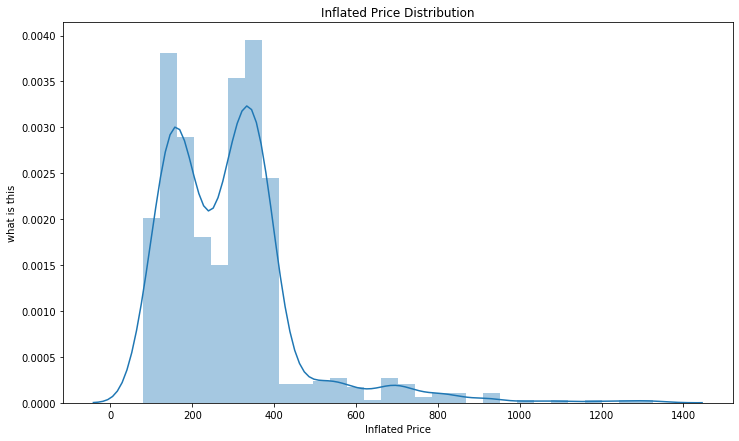

In [48]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated)
plt.title('Inflated Price Distribution')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

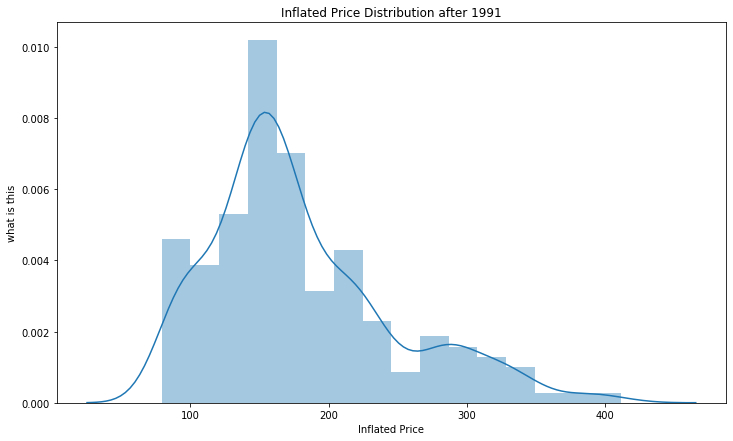

In [49]:
plt.figure(figsize=(12,7))
sns.distplot(df.inflated.loc['1991':])
plt.title('Inflated Price Distribution after 1991')
plt.xlabel('Inflated Price')
plt.ylabel('what is this')
plt.show()

Narrow in on years after 1991, since the distribution evens out (tails to the right still but) more even than with the older years.

### Look at Price vs Regions

#### Caldas vs Price

In [74]:
caldas = pd.DataFrame()

In [103]:
caldas['mean_temp'] = df.Caldas_mean_temp.loc['1991':]
caldas['min_temp'] = df.Caldas_min_temp.loc['1991':]
caldas['mean_precip'] = df.Caldas_mean_precip.loc['1991':]
caldas['price'] = df.inflated.loc['1991':] 
caldas['quantity'] = df.quantity.loc['1991':]

In [104]:
caldas.head()

,mean_temp,min_temp,mean_precip,price,quantity
date,,,,,
1991-01-01,74.500000,59.681256,0.222045,168.750541,1212.0
1991-02-01,72.333333,60.496100,0.146954,170.483585,777.0
1991-03-01,75.333333,61.021969,0.116616,179.406918,494.0
1991-04-01,70.000000,61.344291,0.248679,177.471071,1637.0
1991-05-01,73.749232,61.858357,0.201500,170.243909,1704.0


In [105]:
caldas.tail()

,mean_temp,min_temp,mean_precip,price,quantity
date,,,,,
2018-08-01,76.032258,57.0,0.086429,130.993226,1258.0
2018-09-01,74.482759,61.0,0.396250,126.525333,1050.0
2018-10-01,72.741935,60.0,0.347273,138.804516,1086.0
2018-11-01,72.333333,62.0,0.236250,140.750333,1300.0
2018-12-01,74.774194,60.0,0.020714,129.622903,1283.0


In [108]:
precip = round(caldas.mean_precip.mean(), 2)
temp = round(caldas.mean_temp.mean(), 2)
mintemp = round(caldas.min_temp.mean(), 2)
price = round(caldas.price.mean(), 2)
quantity = round(caldas.quantity.mean(), 2)

print(f'The average precipitation in Caldas is: {precip} cm.')
print(f'The average temperature in Caldas is: {temp} F.')
print(f'The minimum temperature in Caldas is: {mintemp} F.')
print(f'The average inflated price in Caldas is: {price} (2018 USD).')
print(f'The average quantity of coffee exported is: {quantity} in thousands of 60kg bags.')

The average precipitation in Caldas is: 0.23 cm.
The average temperature in Caldas is: 74.04 F.
The minimum temperature in Caldas is: 61.35 F.
The average inflated price in Caldas is: 179.72 (2018 USD).
The average quantity of coffee exported is: 982.65 in thousands of 60kg bags.


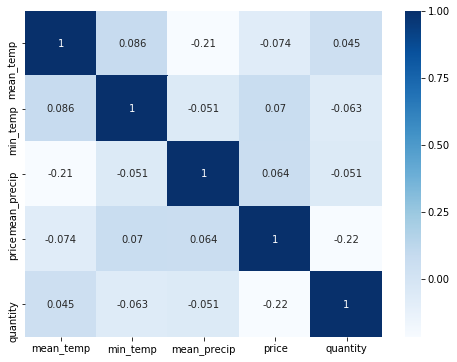

In [109]:
# Do any weather elements in this region correlate largely with price?
plt.figure(figsize=(8,6))
sns.heatmap(caldas.corr(), cmap='Blues', annot=True)
plt.show()

In [110]:
caldas.corr()
# no strong correlation

,mean_temp,min_temp,mean_precip,price,quantity
mean_temp,1.000000,0.085748,-0.213983,-0.074455,0.045078
min_temp,0.085748,1.000000,-0.050998,0.070181,-0.062604
mean_precip,-0.213983,-0.050998,1.000000,0.064087,-0.050540
price,-0.074455,0.070181,0.064087,1.000000,-0.216914
quantity,0.045078,-0.062604,-0.050540,-0.216914,1.000000


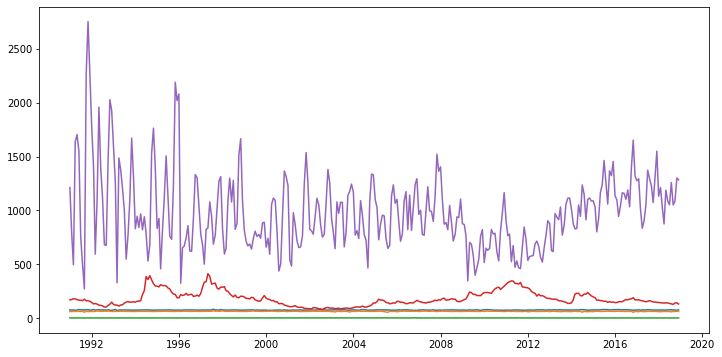

In [111]:
plt.figure(figsize=(12,6))
plt.plot(caldas)
plt.show()
# add in label for each different line

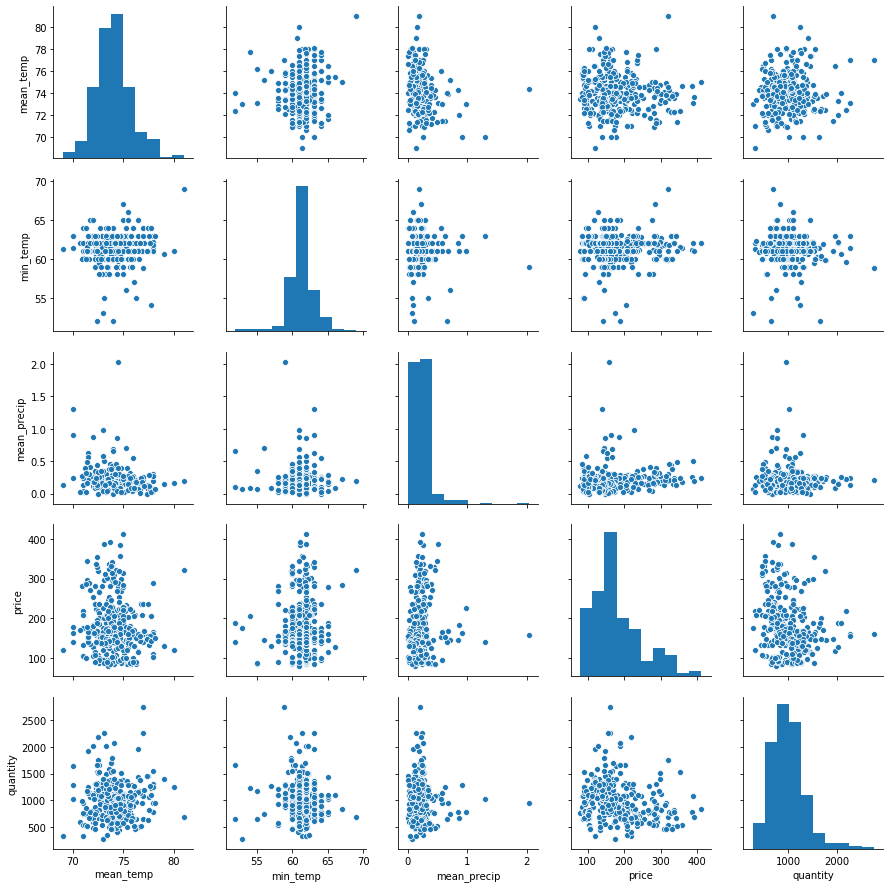

In [112]:
sns.pairplot(caldas)
plt.show()

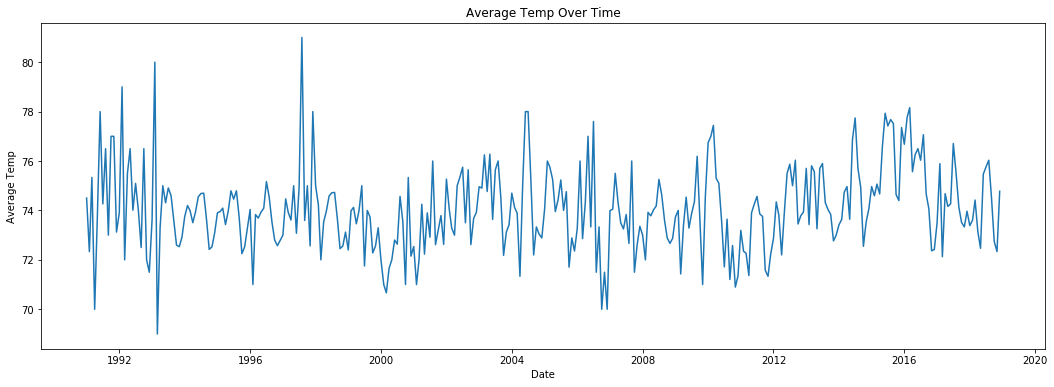

In [113]:
# Are there any major changes in temperature over time
plt.figure(figsize=(18,6))
sns.lineplot(caldas.index, caldas.mean_temp)
plt.title('Average Temp Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temp')
plt.show()

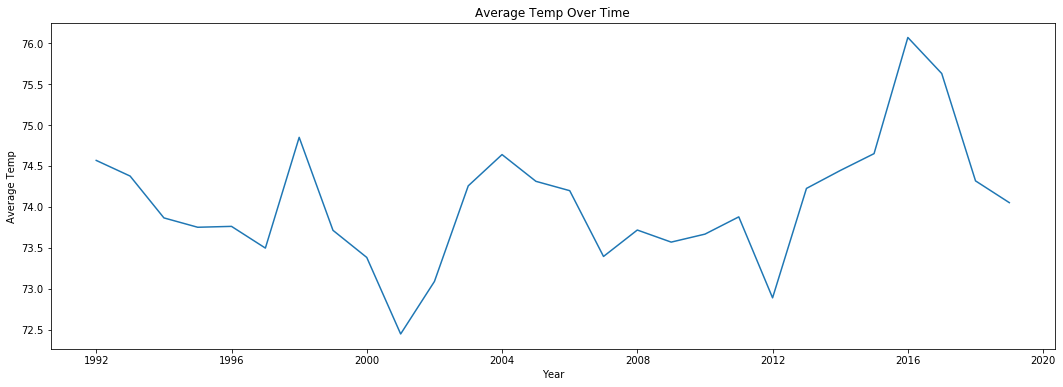

In [114]:
plt.figure(figsize=(18,6))
plt.plot(caldas.mean_temp.resample('Y').mean())
plt.title('Average Temp Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temp')
plt.show()

In [ ]:
# average temps are subtly rising, with an all time high around 2016
# look into any recorded weather phenomena around that year that might have affected coffee production

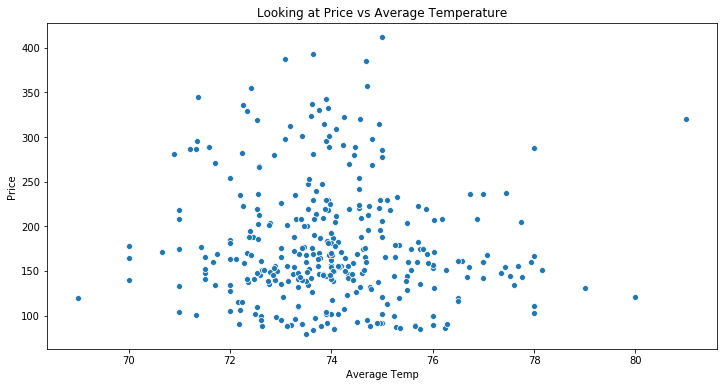

In [115]:
plt.figure(figsize=(12,6))
sns.scatterplot(caldas.mean_temp, caldas.price)
plt.title('Looking at Price vs Average Temperature')
plt.xlabel('Average Temp')
plt.ylabel('Price')
plt.show()

In [ ]:
# Nothing too out of the ordinary stands out, there are some outliers. 
### TO DO:

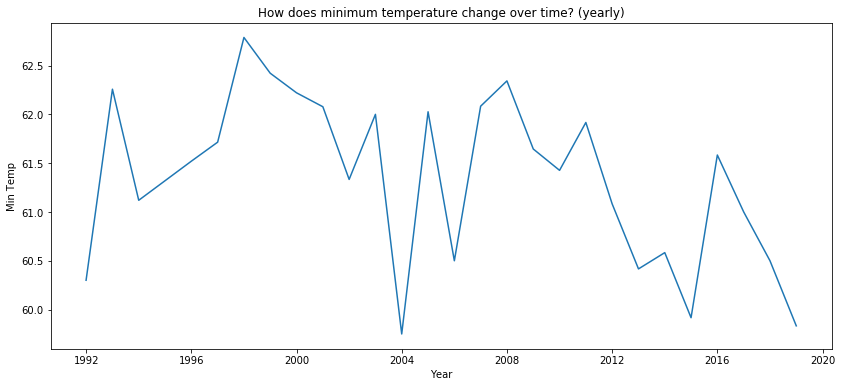

In [116]:
# How does the minimum temperature change over time?
plt.figure(figsize=(14,6))
plt.plot(caldas.min_temp.resample('Y').mean())
#plt.plot(caldas.price.resample('Y').mean())
plt.title('How does minimum temperature change over time? (yearly)')
plt.xlabel('Year')
plt.ylabel('Min Temp')
plt.show()

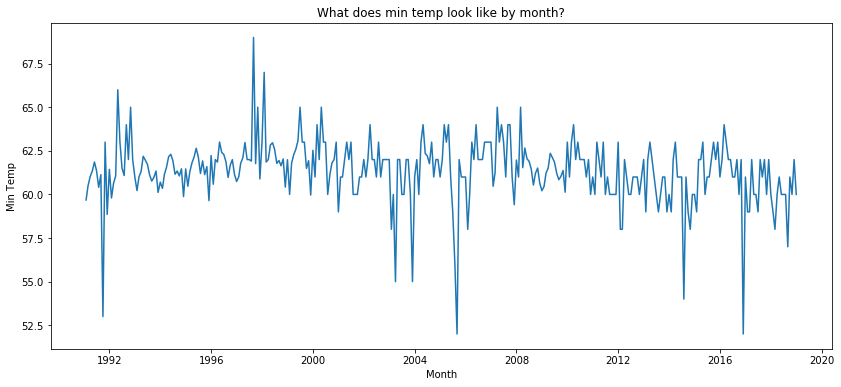

In [117]:
plt.figure(figsize=(14,6))
plt.plot(caldas.min_temp.resample('M').mean())
plt.title('What does min temp look like by month?')
plt.xlabel('Month')
plt.ylabel('Min Temp')
plt.show()

In [ ]:
# There are a few major dips, around 2006 and another big one around 2017. 
# Look at possible factors 

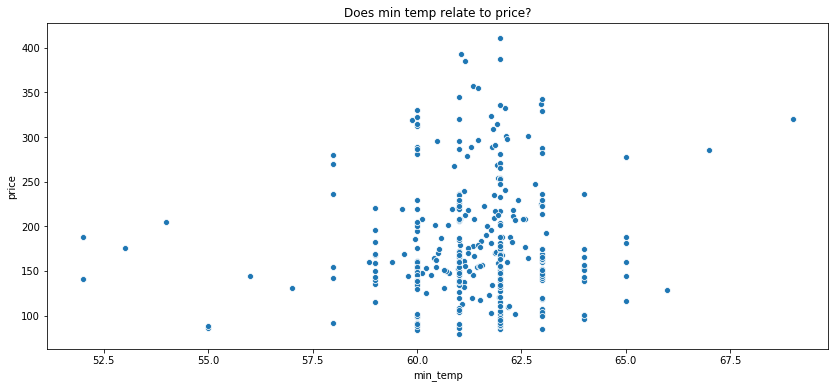

In [119]:
# min temp and price - graph this better 
plt.figure(figsize=(14,6))
sns.scatterplot(caldas.min_temp, caldas.price)
plt.title('Does min temp relate to price?')
plt.show()

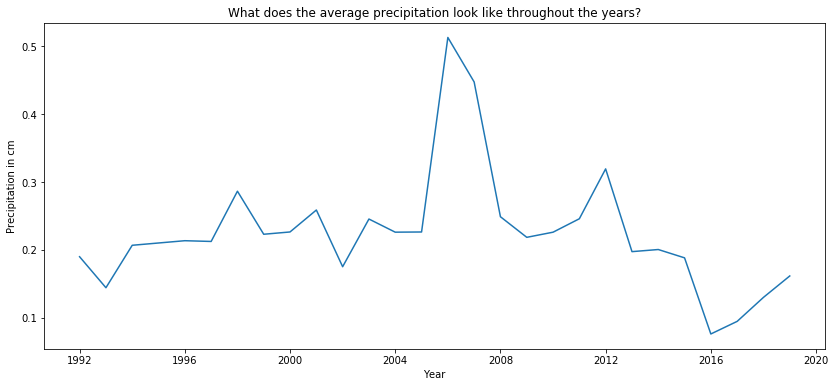

In [122]:
# What does the distribution of precipitation look like for this region?
plt.figure(figsize=(14,6))
plt.plot(caldas.mean_precip.resample('Y').mean())
plt.title('What does the average precipitation look like throughout the years?')
plt.xlabel('Year')
plt.ylabel('Precipitation in cm')
plt.show()

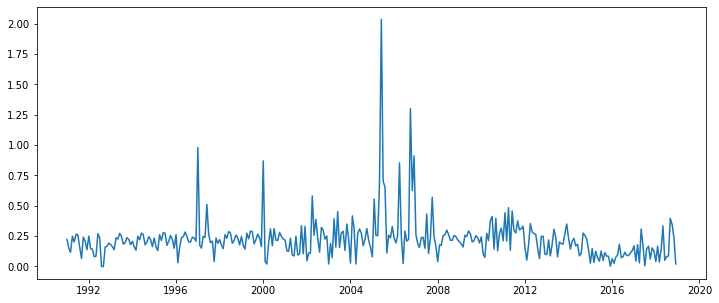

In [123]:
# precip
plt.figure(figsize=(12,5))
plt.plot(caldas.mean_precip)
plt.show()

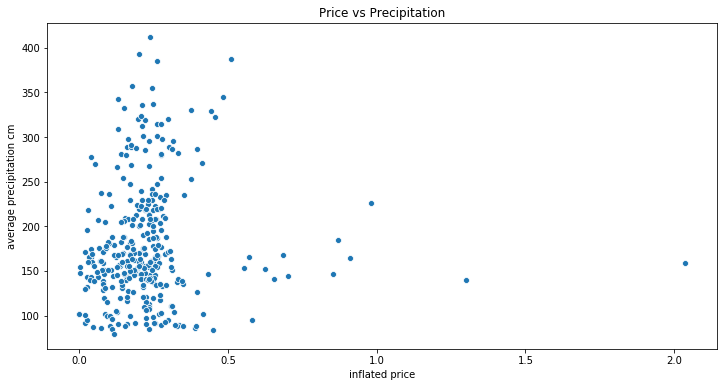

In [124]:
plt.figure(figsize=(12,6))
sns.scatterplot(caldas.mean_precip, caldas.price)
plt.title('Price vs Precipitation')
plt.ylabel('average precipitation cm')
plt.xlabel('inflated price')
plt.show()

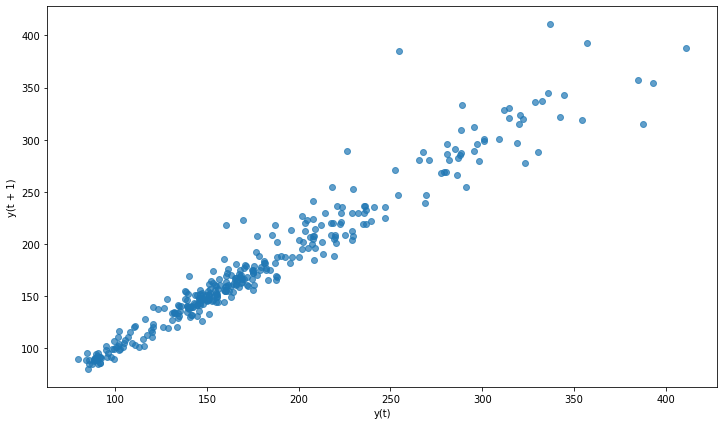

In [136]:
plt.figure(figsize=(12,7))
pd.plotting.lag_plot(caldas.price.resample('M').mean(), lag=1, alpha=.7)
plt.show()
# what am i seeing? is price the right thing to use here?

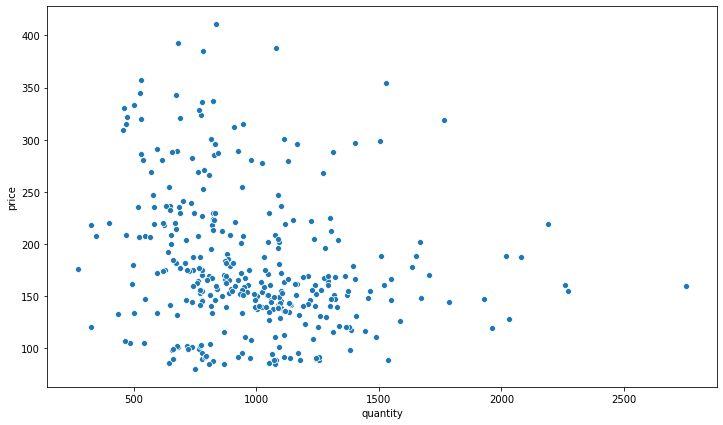

In [189]:
plt.figure(figsize=(12,7))
sns.scatterplot(caldas.quantity, caldas.price)
plt.show()

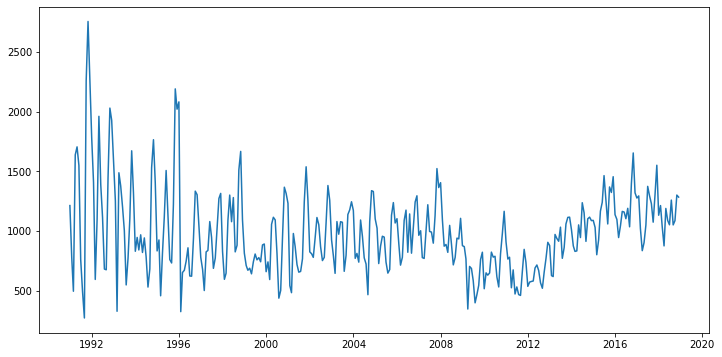

In [193]:
plt.figure(figsize=(12,6))
plt.plot(caldas.quantity)
plt.show()

#### Antioquia vs Price

In [194]:
antioquia = pd.DataFrame()

In [195]:
antioquia['precip'] = df.Antioquia_mean_precip.loc['1991':]
antioquia['mean_temp'] = df.Antioquia_mean_temp.loc['1991':]
antioquia['min_temp'] = df.Antioquia_min_temp.loc['1991':]
antioquia['price'] = df.inflated.loc['1991':]
antioquia['quantity'] = df.quantity.loc['1991':]

In [196]:
antioquia.head()

,precip,mean_temp,min_temp,price,quantity
date,,,,,
1991-01-01,0.092222,54.466667,36.0,168.750541,1212.0
1991-02-01,0.030000,54.000000,36.0,170.483585,777.0
1991-03-01,0.142000,55.000000,39.0,179.406918,494.0
1991-04-01,0.070000,54.166667,40.0,177.471071,1637.0
1991-05-01,0.353333,55.714286,42.0,170.243909,1704.0


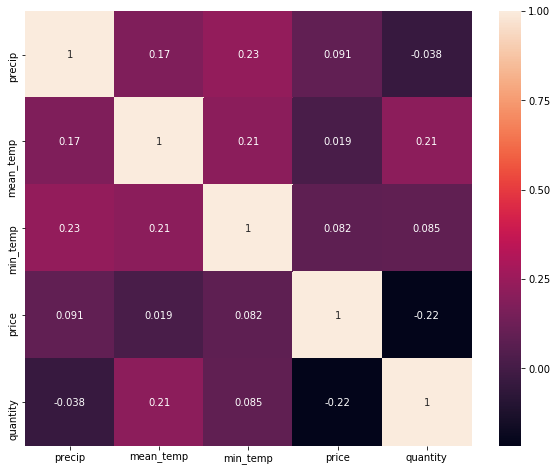

In [197]:
plt.figure(figsize=(10,8))
sns.heatmap(antioquia.corr(), annot=True)
plt.show()

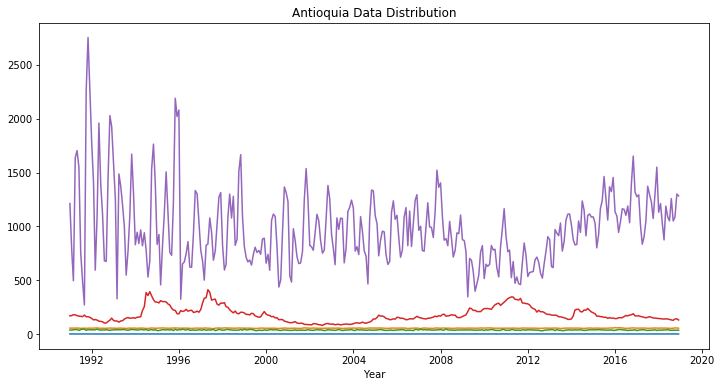

In [199]:
plt.figure(figsize=(12,6))
plt.plot(antioquia)
plt.title('Antioquia Data Distribution')
plt.xlabel('Year')
plt.show()

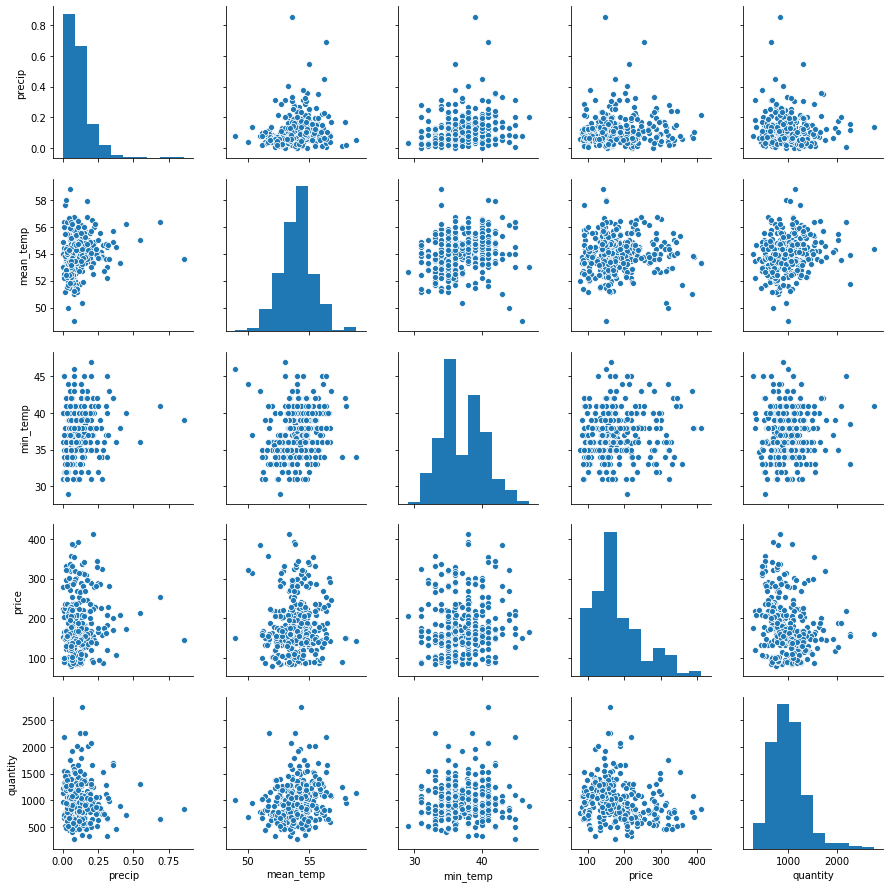

In [200]:
sns.pairplot(antioquia)
plt.show()

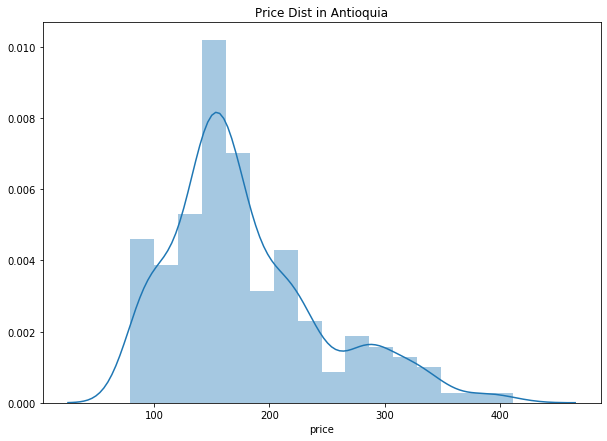

In [201]:
plt.figure(figsize=(10,7))
sns.distplot(antioquia.price)
plt.title('Price Dist in Antioquia')
plt.show()

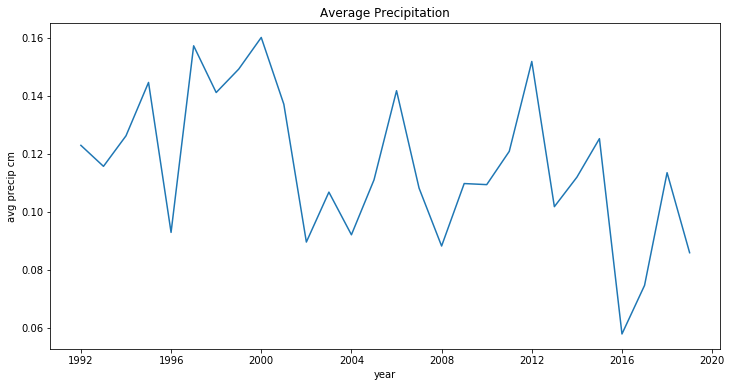

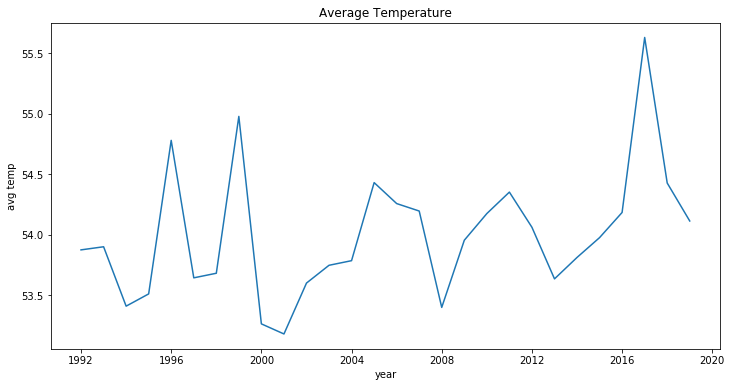

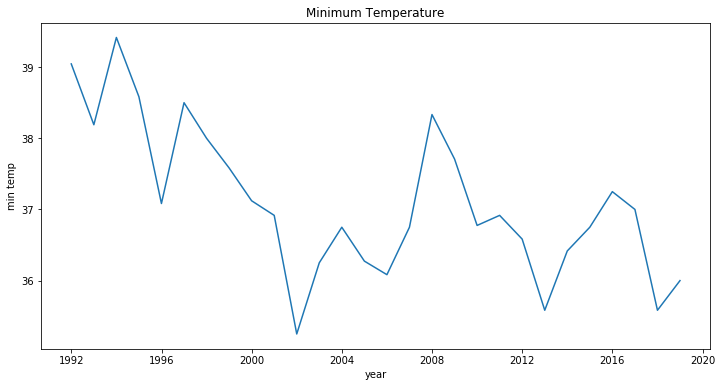

In [202]:
# What do the individual feature distributions look like?
plt.figure(figsize=(12,6))
plt.plot(antioquia.precip.resample('Y').mean())
plt.title('Average Precipitation')
plt.xlabel('year')
plt.ylabel('avg precip cm')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.mean_temp.resample('Y').mean())
plt.title('Average Temperature')
plt.xlabel('year')
plt.ylabel('avg temp')
plt.show()
plt.figure(figsize=(12,6))
plt.plot(antioquia.min_temp.resample('Y').mean())
plt.title('Minimum Temperature')
plt.xlabel('year')
plt.ylabel('min temp')
plt.show()

In [ ]:
# There are peaks and valleys in the data. Describe possible causes in the largest of those from the research

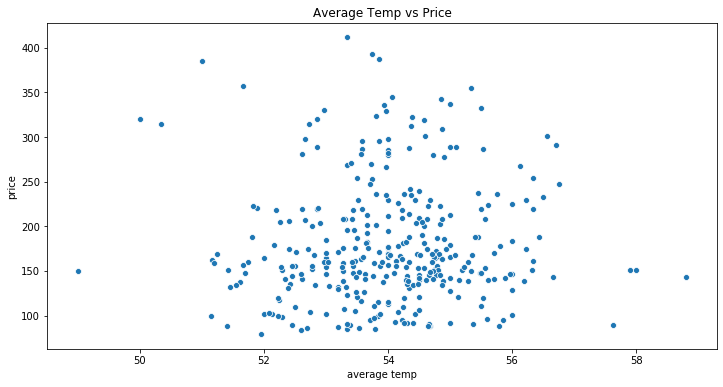

In [203]:
# Does price affect the average temperature in this region?
plt.figure(figsize=(12,6))
sns.scatterplot(antioquia.mean_temp, antioquia.price)
plt.title("Average Temp vs Price")
plt.xlabel('average temp')
plt.ylabel('price')
plt.show()

In [ ]:
# There is no distinct relationship/trends in the data. There are some outliers. 
### TO DO: look into major outliers

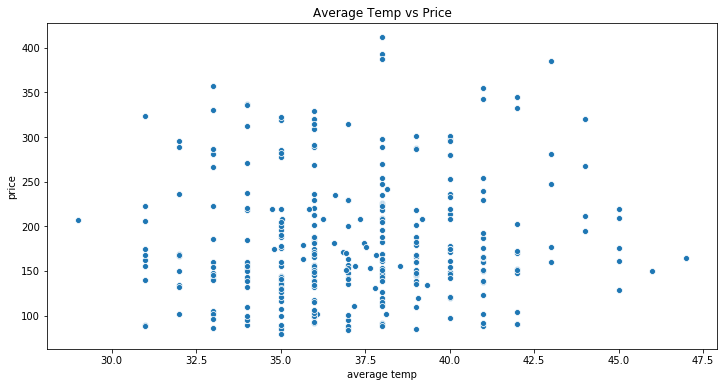

In [204]:
plt.figure(figsize=(12,6))
sns.scatterplot(antioquia.min_temp, antioquia.price)
plt.title("Average Temp vs Price")
plt.xlabel('average temp')
plt.ylabel('price')
plt.show()

In [ ]:
# no correlation (?)

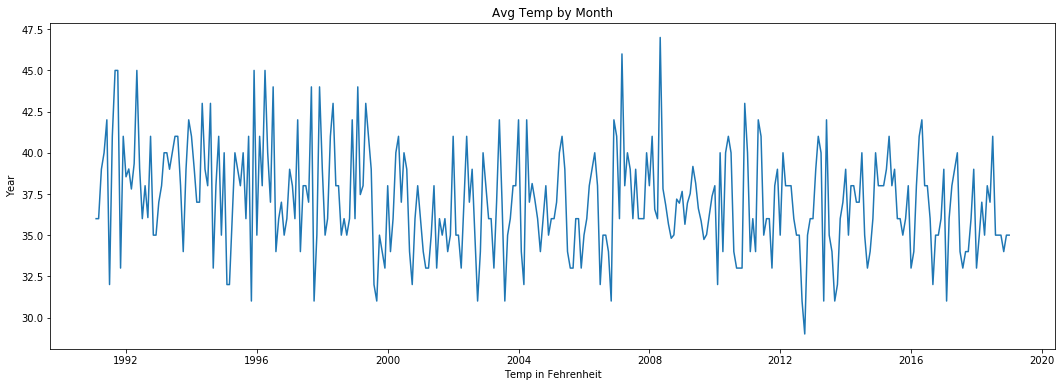

In [205]:
plt.figure(figsize=(18,6))
plt.plot(antioquia.min_temp.resample("M").mean())
plt.title('Avg Temp by Month')
plt.xlabel('Temp in Fehrenheit')
plt.ylabel('Year')
plt.show()

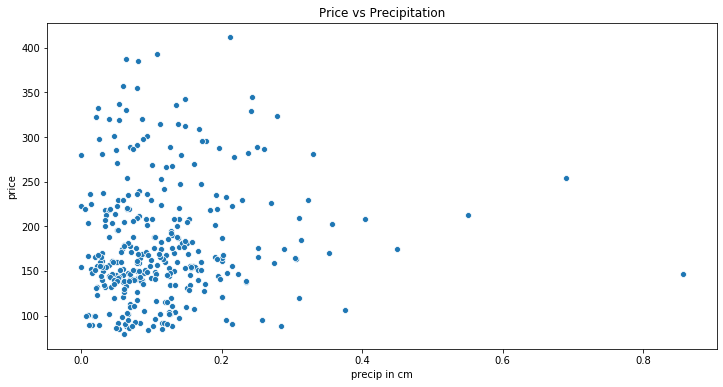

In [206]:
plt.figure(figsize=(12,6))
sns.scatterplot(antioquia.precip, antioquia.price)
plt.title('Price vs Precipitation')
plt.xlabel('precip in cm')
plt.ylabel('price')
plt.show()

In [ ]:
# There is a cluster towards the lower end of the precipitation, a few outliers in higher ranges of precip
# Price appears to be higher with lower precip, mid-range with higher

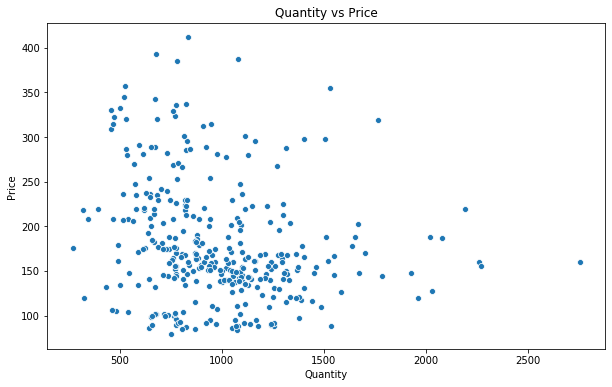

In [218]:
# What am I looking for in this graph?
plt.figure(figsize=(10,6))
sns.scatterplot(antioquia.quantity, antioquia.price)
plt.title('Quantity vs Price')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

#### Cauca vs Price

In [219]:
cauca = pd.DataFrame()

In [220]:
cauca['precip'] = df.Cauca_mean_precip.loc['1991':]
cauca['mean_temp'] = df.Cauca_mean_temp.loc['1991':]
cauca['min_temp'] = df.Cauca_min_temp.loc['1991':]
cauca['price'] = df.price.loc['1991':]
cauca['quantity'] = df.quantity.loc['1991':]

In [221]:
cauca.head()

,precip,mean_temp,min_temp,price,quantity
date,,,,,
1991-01-01,0.613333,80.111111,71.0,91.53,1212.0
1991-02-01,0.490000,80.400000,71.0,92.47,777.0
1991-03-01,0.598333,80.750000,73.0,97.31,494.0
1991-04-01,0.444444,81.727273,73.0,96.26,1637.0
1991-05-01,0.711250,80.375000,73.0,92.34,1704.0


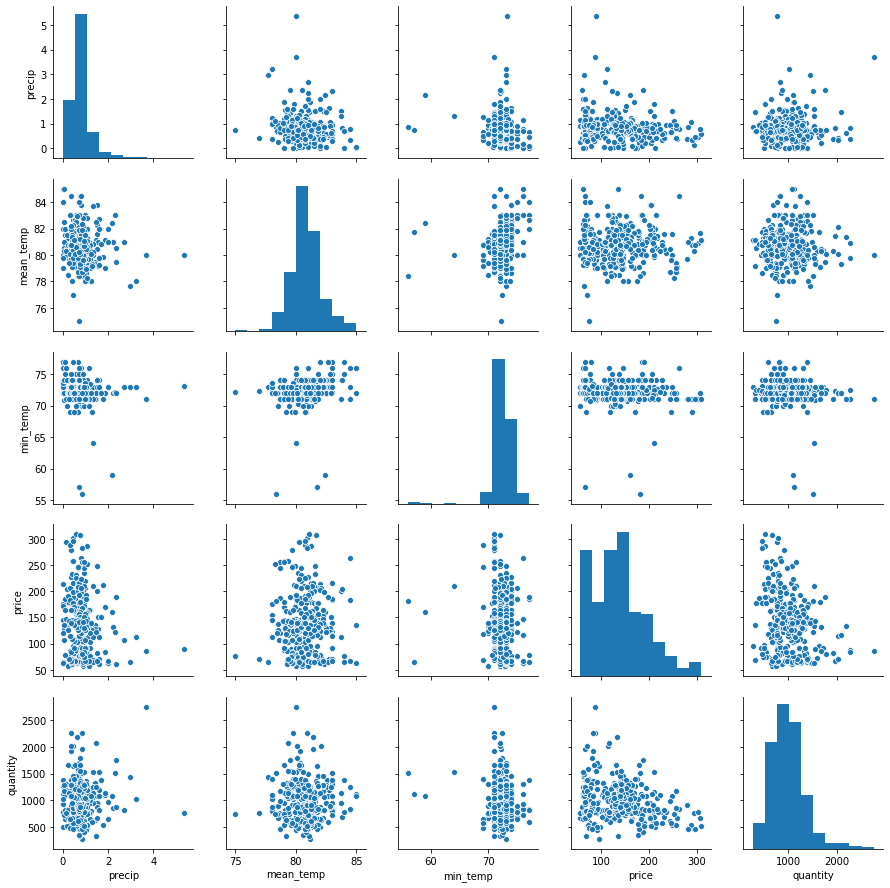

In [222]:
sns.pairplot(cauca)
plt.show()

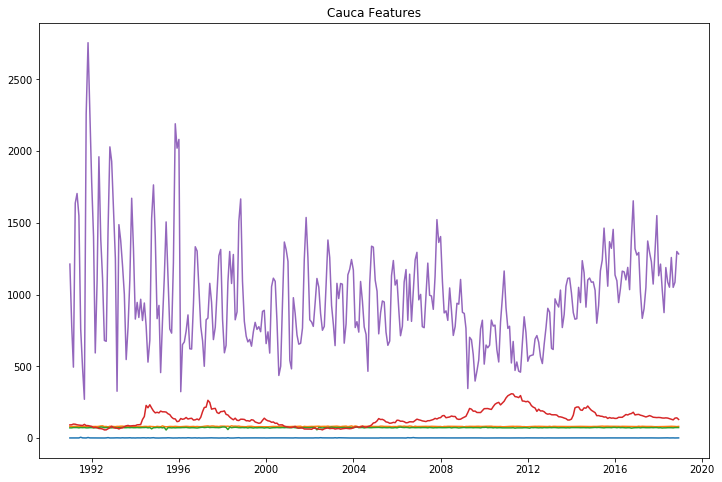

In [224]:
plt.figure(figsize=(12,8))
plt.plot(cauca)
plt.title('Cauca Features')
plt.show()
# label features

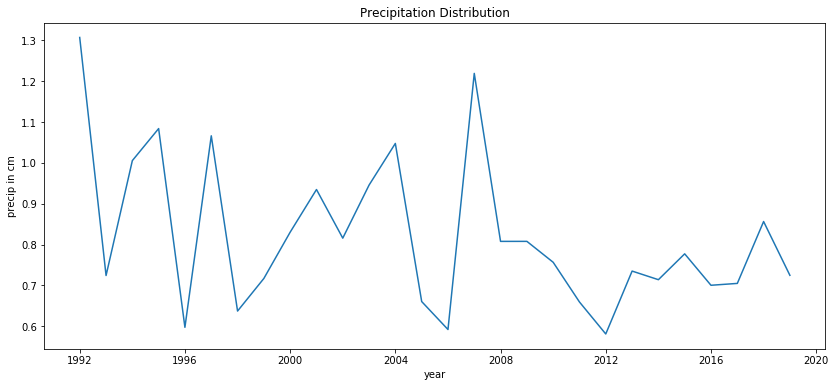

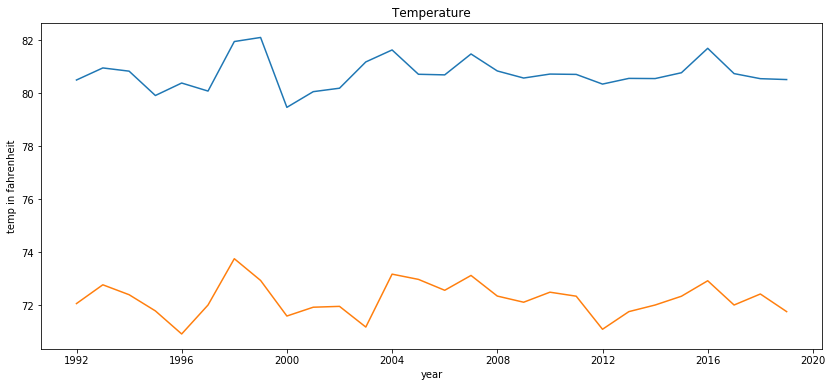

In [229]:
plt.figure(figsize=(14,6))
plt.plot(cauca.precip.resample("Y").mean())
plt.title('Precipitation Distribution')
plt.xlabel('year')
plt.ylabel('precip in cm')
plt.show()
plt.figure(figsize=(14,6))
plt.plot(cauca.mean_temp.resample("Y").mean())
#plt.title('Average Temperature')
# plt.xlabel('year')
# plt.ylabel('temp in fahrenheit')
# plt.show()
#plt.figure(figsize=(14,6))
plt.plot(cauca.min_temp.resample("Y").mean())
plt.title('Temperature')
plt.xlabel('year')
plt.ylabel('temp in fahrenheit')
plt.show()

In [245]:
# temperature has a larger spike around 1998
# precipitation has a large spike around 2000

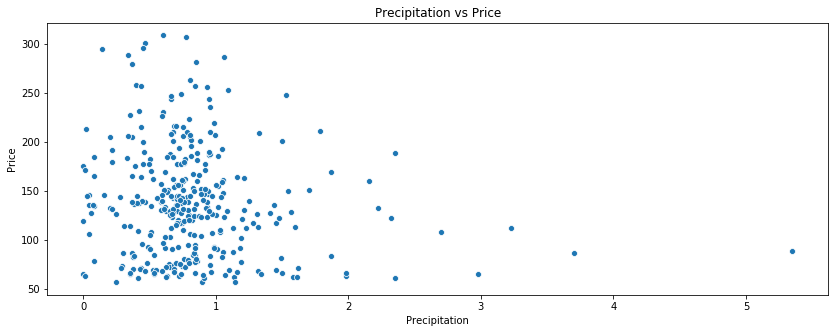

In [230]:
plt.figure(figsize=(14,5))
sns.scatterplot(cauca.precip, cauca.price)
plt.title("Precipitation vs Price")
plt.xlabel('Precipitation')
plt.ylabel('Price')
plt.show()

In [ ]:
# Conistant trends with other regions vs price

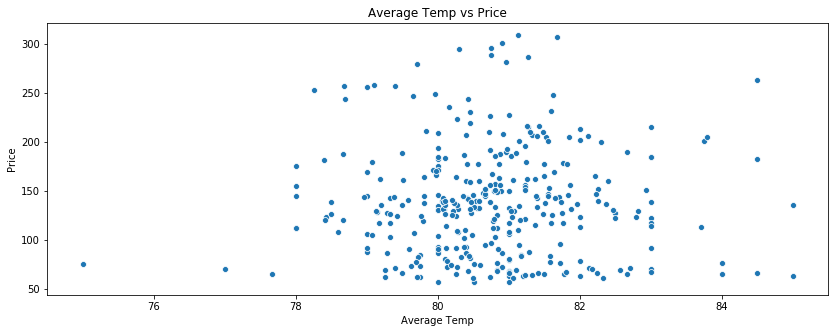

In [231]:
plt.figure(figsize=(14,5))
sns.scatterplot(cauca.mean_temp, cauca.price)
plt.title('Average Temp vs Price')
plt.xlabel('Average Temp')
plt.ylabel('Price')
plt.show()

In [176]:
# no correlation

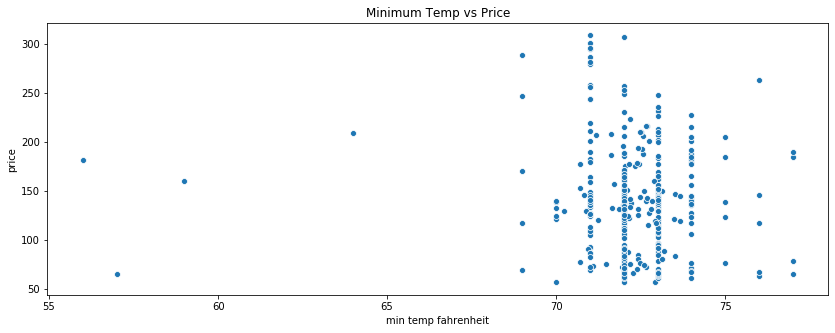

In [232]:
plt.figure(figsize=(14,5))
sns.scatterplot(cauca.min_temp, cauca.price)
plt.title('Minimum Temp vs Price')
plt.xlabel('min temp fahrenheit')
plt.ylabel('price')
plt.show()

In [ ]:
# what am i looking at?

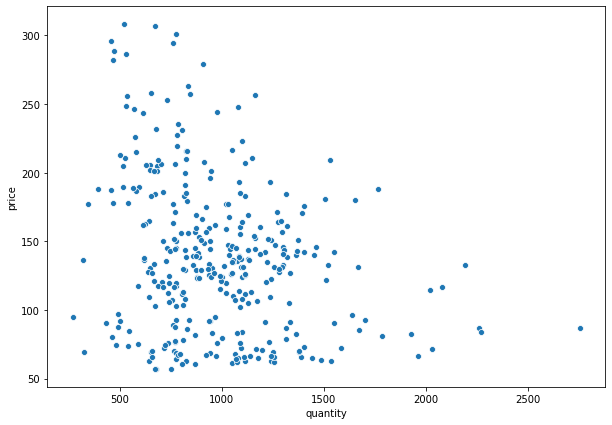

In [234]:
# Look at quantity in this region vs price
plt.figure(figsize=(10,7))
sns.scatterplot(cauca.quantity, cauca.price)
plt.show()

In [235]:
narino = pd.DataFrame()

In [236]:
narino['precip'] = df.Narino_mean_precip.loc['1991':]
narino['mean_temp'] = df.Narino_mean_temp.loc['1991':]
narino['min_temp'] = df.Narino_min_temp.loc['1991':]
narino['price'] = df.price.loc['1991':]
narino['quantity'] = df.quantity.loc['1991':]

In [237]:
narino.head()

,precip,mean_temp,min_temp,price,quantity
date,,,,,
1991-01-01,0.129355,67.022931,32.0,91.53,1212.0
1991-02-01,0.063571,66.601236,56.0,92.47,777.0
1991-03-01,0.293871,67.011747,32.0,97.31,494.0
1991-04-01,0.091000,67.765591,32.0,96.26,1637.0
1991-05-01,0.217742,67.931822,55.0,92.34,1704.0


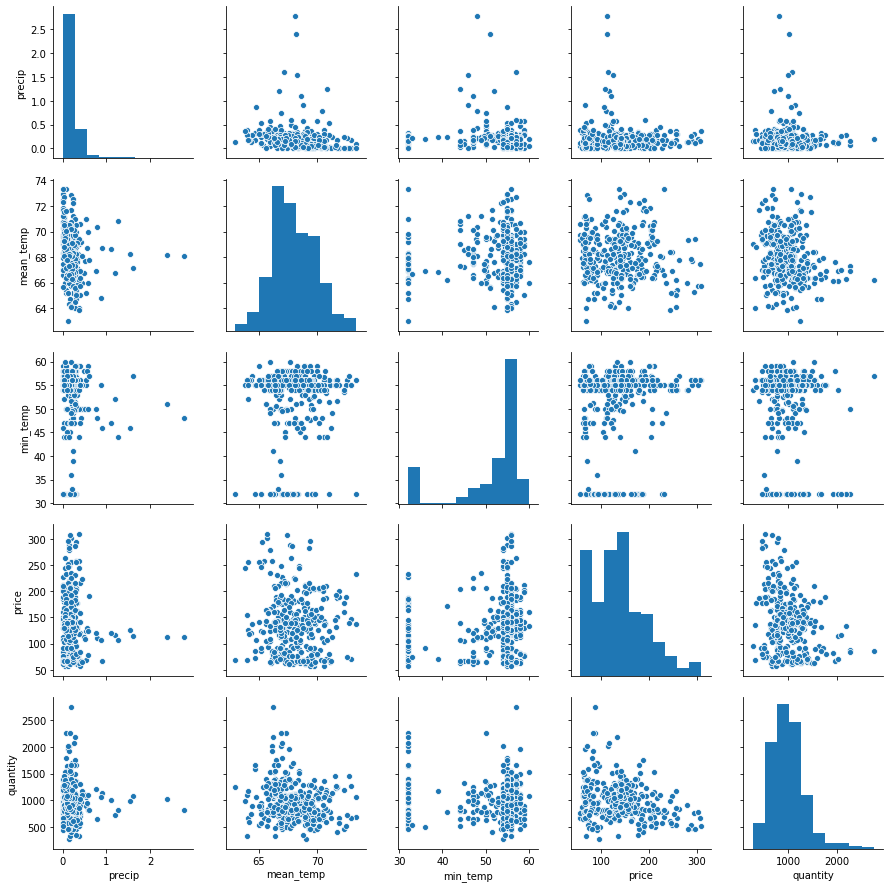

In [238]:
sns.pairplot(narino)
plt.show()

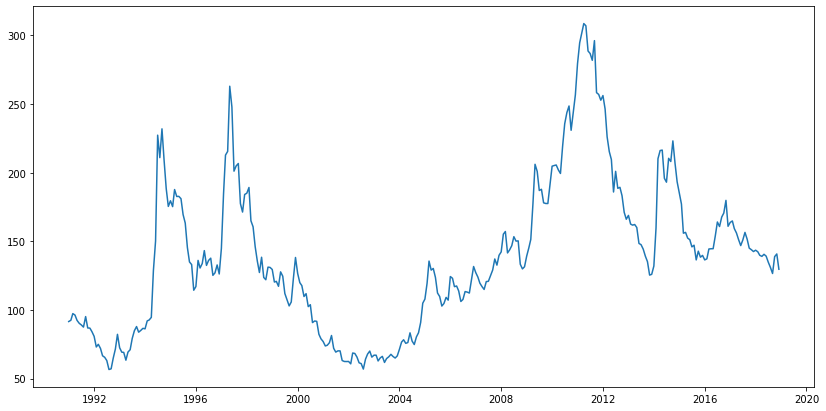

In [244]:
plt.figure(figsize=(14,7))
plt.plot(narino.price)
plt.show()

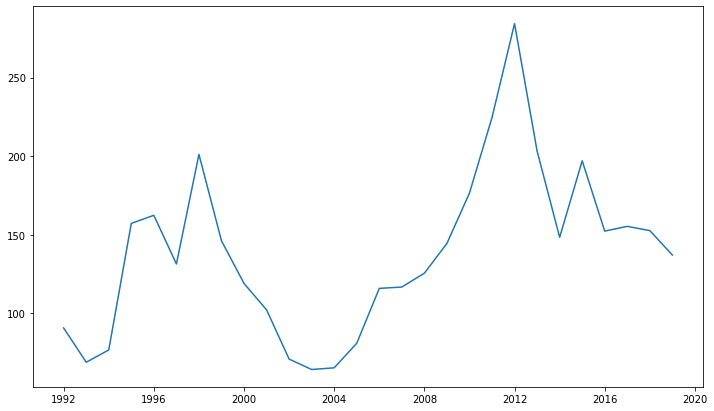

In [246]:
plt.figure(figsize=(12,7))
plt.plot(narino.price.resample('Y').mean())
plt.show()

In [ ]:
valle = pd.DataFrame()

In [ ]:
valle['precip'] = df.Valle_mean_precip
valle['mean_temp'] = df.Valle_mean_temp
valle['min_temp'] = df.Valle_min_temp
valle['price'] = df.inflated

In [ ]:
cesar = pd.DataFrame()

In [ ]:
cesar['precip'] = df.Cesar_mean_precip
cesar['mean_temp'] = df.Cesar_mean_temp
cesar['min_temp'] = df.Cesar_min_temp
cesar['price'] = df.inflated

In [ ]:
tolima = pd.DataFrame()

In [ ]:
tolima['precip'] = df.Tolima_mean_precip
tolima['mean_temp'] = df.Tolima_mean_temp
tolima['min_temp'] = df.Tolima_min_temp
tolima['price'] = df.inflated

In [ ]:
huila = pd.DataFrame()

In [ ]:
huila['precip'] = df.Huila_mean_precip
huila['mean_temp'] = df.Huila_mean_temp
huila['min_temp'] = df.Huila_min_temp
huila['price'] = df.inflated

In [ ]:
santander = pd.DataFrame()

In [ ]:
santander['precip'] = df.Santander_mean_precip
santander['mean_temp'] = df.Santander_mean_temp
santander['min_temp'] = df.Santander_min_temp
santander['price'] = df.inflated

In [ ]:
magdalena = pd.DataFrame()

In [ ]:
magdalena['precip'] = df.Magdalena_mean_precip
magdalena['mean_temp'] = df.Magdalena_mean_temp
magdalena['min_temp'] = df.Magdalena_min_temp
magdalena['price'] = df.inflated

In [ ]:
quindio = pd.DataFrame()

In [ ]:
quindio['precip'] = df.Quindio_mean_precip
quindio['mean_temp'] = df.Quindio_mean_temp
quindio['min_temp'] = df.Quindio_min_temp
quindio['price'] = df.inflated

In [ ]:
risaralda = pd.DataFrame()

In [ ]:
risaralda['precip'] = df.Risaralda_mean_precip
risaralda['mean_temp'] = df.Risaralda_mean_temp
risaralda['min_temp'] = df.Risaralda_min_temp
risaralda['price'] = df.inflated

In [ ]:
cundinarca = pd.DataFrame()

In [ ]:
cundinarca['precip'] = df.Cundinarca_mean_precip
cundinarca['mean_temp'] = df.Cundinarca_mean_temp
cundinarca['min_temp'] = df.Cundinarca_min_temp
cundinarca['price'] = df.inflated

#### How does the delta in temperatures relate to price?

In [248]:
df.head()

,quantity,price,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,782.0,45.68,387.519181,0.040000,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,449.0,45.95,389.809684,0.040000,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367
1960-03-01,266.0,45.10,382.598841,0.143158,71.875000,54.741925,0.124545,58.347826,34.199076,0.012903,...,66.368796,0.061226,83.154188,73.557848,-0.178350,87.567455,76.982745,0.154044,69.713106,61.178475
1960-04-01,264.0,45.20,383.447176,0.525000,72.687500,55.906027,0.113750,59.687500,38.081443,0.008000,...,67.912503,0.204186,82.330770,71.204803,-0.095321,87.131671,78.062566,0.203308,69.024617,61.300378
1960-05-01,602.0,44.73,379.460004,0.191000,72.181818,55.326548,0.276555,59.458333,38.367067,0.016774,...,67.875379,0.195359,81.782540,70.861052,0.042621,85.752403,78.742579,0.150532,69.160477,60.614402


In [249]:
df1 = df.drop(columns=(['price', 'quantity']))

In [252]:
df1.head(3)

,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,Narino_mean_temp,Narino_min_temp,...,Tolima_min_temp,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,387.519181,0.040000,72.500000,53.446162,0.280000,58.250000,30.875838,0.072655,65.709097,45.765823,...,62.826583,-0.054432,83.394728,72.399317,0.119673,85.574639,74.166190,0.111732,69.105673,59.956370
1960-02-01,389.809684,0.040000,72.210526,54.300065,0.082857,58.894737,31.438934,0.015172,65.148039,50.533429,...,64.635809,0.021487,83.592275,72.199709,-0.160911,86.849857,76.056101,0.167760,69.504415,60.659367
1960-03-01,382.598841,0.143158,71.875000,54.741925,0.124545,58.347826,34.199076,0.012903,66.165378,52.328187,...,66.368796,0.061226,83.154188,73.557848,-0.178350,87.567455,76.982745,0.154044,69.713106,61.178475


In [267]:
df1['mean_temp'] = ((df1.Caldas_mean_temp + df1.Narino_mean_temp + 
                    df1.Antioquia_mean_temp + df1.Cauca_mean_temp + 
                    df1.Quindio_mean_temp + df1.Magdalena_mean_temp +
                    df1.Huila_mean_temp + df1.Risaralda_mean_temp + 
                    df1.Tolima_mean_temp + df1.Santander_mean_temp +
                    df1.Cesar_mean_temp + df1.Valle_mean_temp + df1.Cundinamarca_mean_temp) / 13)

In [272]:
df1.head(1)

,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,Narino_mean_temp,Narino_min_temp,...,Valle_mean_precip,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp,mean_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,387.519181,0.04,72.5,53.446162,0.28,58.25,30.875838,0.072655,65.709097,45.765823,...,-0.054432,83.394728,72.399317,0.119673,85.574639,74.16619,0.111732,69.105673,59.95637,74.318918


In [273]:
df1['min_temp'] = ((df1.Caldas_min_temp + df1.Narino_min_temp + 
                    df1.Antioquia_mean_temp + df1.Cauca_min_temp + 
                    df1.Quindio_min_temp + df1.Magdalena_min_temp +
                    df1.Huila_min_temp + df1.Risaralda_min_temp + 
                    df1.Tolima_min_temp + df1.Santander_min_temp +
                    df1.Cesar_min_temp + df1.Valle_min_temp + df1.Cundinamarca_min_temp) / 13)

In [274]:
df1.head(1)

,inflated,Caldas_mean_precip,Caldas_mean_temp,Caldas_min_temp,Cundinamarca_mean_precip,Cundinamarca_mean_temp,Cundinamarca_min_temp,Narino_mean_precip,Narino_mean_temp,Narino_min_temp,...,Valle_mean_temp,Valle_min_temp,Cesar_mean_precip,Cesar_mean_temp,Cesar_min_temp,Santander_mean_precip,Santander_mean_temp,Santander_min_temp,mean_temp,min_temp
date,,,,,,,,,,,,,,,,,,,,,
1960-01-01,387.519181,0.04,72.5,53.446162,0.28,58.25,30.875838,0.072655,65.709097,45.765823,...,83.394728,72.399317,0.119673,85.574639,74.16619,0.111732,69.105673,59.95637,74.318918,57.803864


In [275]:
df1 = df1[['mean_temp', 'min_temp']]

In [278]:
df1.head(2)

,mean_temp,min_temp
date,,
1960-01-01,74.318918,57.803864
1960-02-01,74.627668,58.695773


In [283]:
df1['delta'] = (df1.mean_temp - df1.min_temp)

In [284]:
df1.head(1)

,mean_temp,min_temp,delta
date,,,
1960-01-01,74.318918,57.803864,16.515054


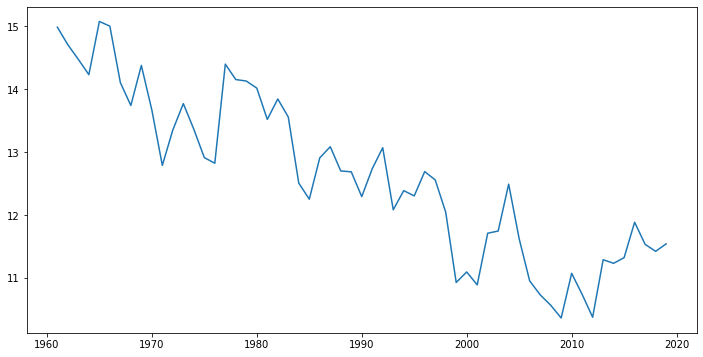

In [290]:
plt.figure(figsize=(12,6))
plt.plot(df1.delta.resample('Y').mean())
plt.show()

In [292]:
df1['price'] = df.inflated

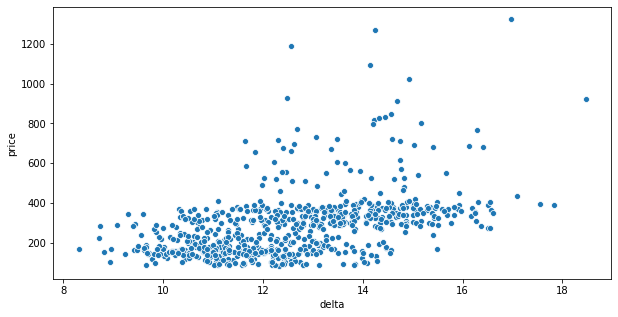

In [295]:
# Look at the delta, what am I looking at with this? What question am I looking to ask?
plt.figure(figsize=(10,5))
sns.scatterplot(df1.delta, df1.price)
plt.title('')
plt.show()

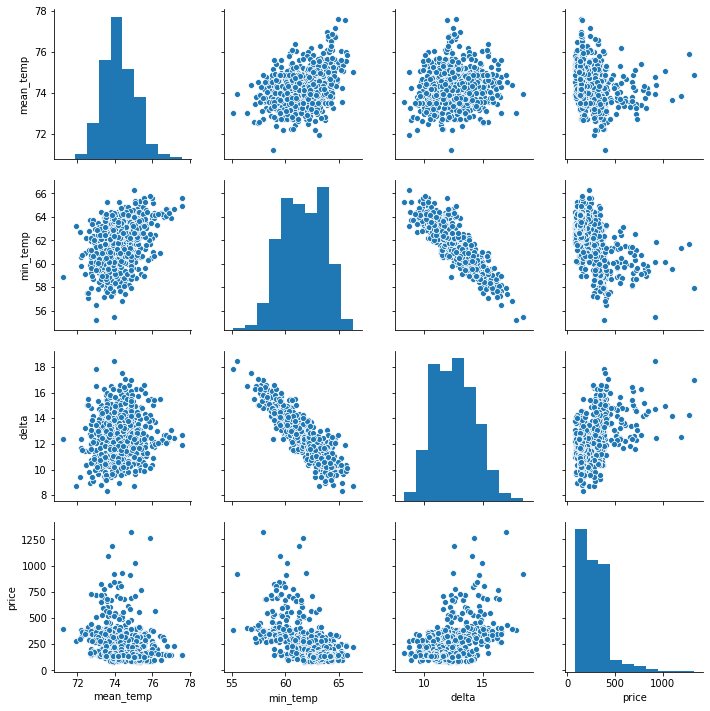

In [298]:
sns.pairplot(df1)
plt.show()

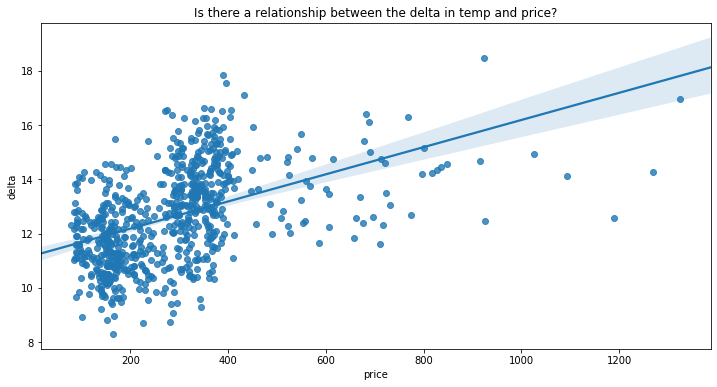

In [310]:
plt.figure(figsize=(12,6))
sns.regplot(df1.price, df1.delta)
plt.title('Is there a relationship between the delta in temp and price?')
plt.show()